In [1]:
import sys
import os
sys.path.append('..')
sys.path.append('../failure_directions')
import src.svm_utils as svm_utils
import src.visualization_utils as viz_utils
import src.ds_utils as ds_utils
import torch
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from src.label_maps import CLASS_DICT
import pickle as pkl


sns.set()
BLUE = sns.color_palette("tab10")[0]
RED = sns.color_palette("tab10")[3]
ORANGE = sns.color_palette("tab10")[1]
BROWN = sns.color_palette("tab10")[5]
GRAY = sns.color_palette("tab10")[7]
GREEN = sns.color_palette("tab10")[2]

import matplotlib.pylab as pylab
params = {'legend.fontsize': 12,
          'figure.figsize': (5, 3),
         'axes.labelsize': 14,
         'axes.titlesize':16,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
pylab.rcParams.update(params)


/mnt/cfs/home/saachij/conda_envs/ffcv_cfs/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cifar_label_list = np.array([CLASS_DICT['CIFAR'][u] for u in range(10)])

In [3]:
beton_root = "/mnt/cfs/projects/correlated_errors/betons"
experiment_root = "/mnt/cfs/projects/correlated_errors/experiments/cifar/cifar_0.25"

svm_name = "svm_cifar_0.25_unlabeled_normalized"
name = os.path.join(experiment_root, f"svm_checkpoints/{svm_name}.pt") # SVM output file
svm_model_name = os.path.join(experiment_root, f"svm_checkpoints/{svm_name}_model.pkl") # SVM output file
model_root = os.path.join(experiment_root, "models")
model_ckpt = os.path.join(model_root, "cifar10_0.25_unlabeled/version_0/checkpoints/checkpoint_last.pt")
loss_upweight_root = os.path.join(experiment_root, "loss_vec_files")
subset_root = os.path.join(experiment_root, "subset_index_files")

%cd ../failure_directions
processor = viz_utils.SVMProcessor(name, root=beton_root, checkpoint_path=model_ckpt, get_unlabeled=True)
%cd ../analysis_nbs
svm_model = processor._build_model(model_ckpt)


/mnt/cfs/home/saachij/src/failure-directions/failure_directions
-----------train_metrics--------------
{'Confusion Matrix': array([[ 439,  192],
       [3195, 6174]]),
 'Model Accuracy': 0.9369,
 'SVM Accuracy': 0.661300003528595,
 'SVM Balanced Accuracy': 0.6773514151573181}
-----------val_metrics--------------
{'Confusion Matrix': array([[1593,  415],
       [1713, 6279]]),
 'Model Accuracy': 0.7992,
 'SVM Accuracy': 0.7871999740600586,
 'SVM Balanced Accuracy': 0.7894936800003052}
-----------test_metrics--------------
{'Confusion Matrix': array([[1346,  749],
       [2007, 5898]]),
 'Model Accuracy': 0.7905,
 'SVM Accuracy': 0.724399983882904,
 'SVM Balanced Accuracy': 0.6942960917949677}
-----------unlabeled_metrics--------------
{'Confusion Matrix': array([[ 3972,  2185],
       [ 5945, 17898]]),
 'Model Accuracy': 0.7947666666666666,
 'SVM Accuracy': 0.7289999723434448,
 'SVM Balanced Accuracy': 0.6978899836540222}
Using default os_cache: False
Using default quasi_random: True
Us

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.99it/s]


Accuracy 0.9491999745368958


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 79.34it/s]


Accuracy 0.7991999983787537


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 54.28it/s]


Accuracy 0.7904999852180481


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 150.36it/s]


Accuracy 0.7947999835014343
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs
{'training_args': {'epochs': 35, 'lr': 0.5, 'optimizer': {'momentum': 0.9, 'weight_decay': 0.0005}, 'lr_scheduler': {'type': 'cyclic', 'lr_peak_epoch': 5}, 'iters_per_epoch': 19}, 'epoch': 34, 'training_metrics': {'loss': 0.17487808826722598, 'acc': 0.9425370065789473}, 'val_metrics': {'loss': 0.6609623561382294, 'acc': 0.7992000002861023}}


In [4]:
split = 'test'
test_dv = processor.metrics[f'{split}_metrics']['decision_values']
test_confs = processor.run_dict[split]['confs']
test_class = processor.metrics[f'{split}_metrics']['classes'] # 0 if female, 1 if male
test_pred_correct = processor.metrics[f'{split}_metrics']['ypred']
test_correct = processor.metrics[f'{split}_metrics']['ytrue']

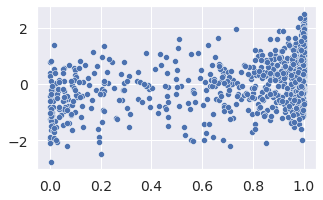

---- CONFIDENCE ------


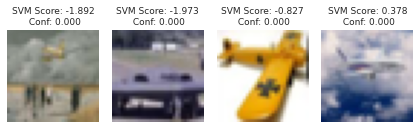

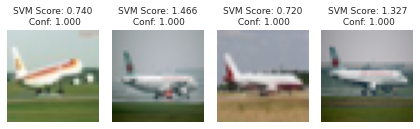

---- SVM ------


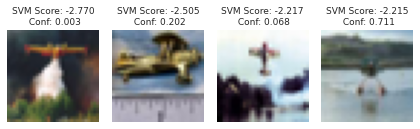

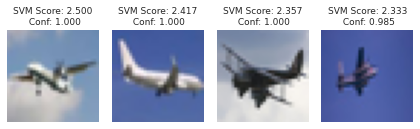

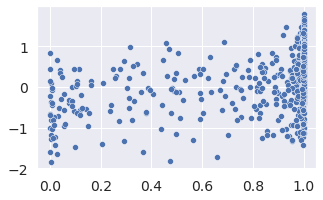

---- CONFIDENCE ------


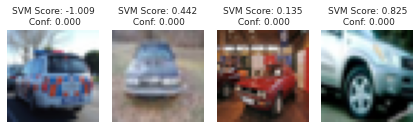

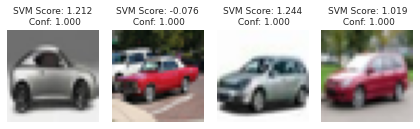

---- SVM ------


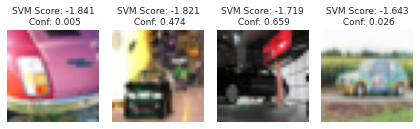

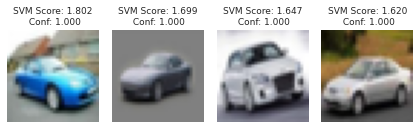

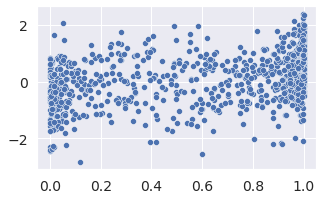

---- CONFIDENCE ------


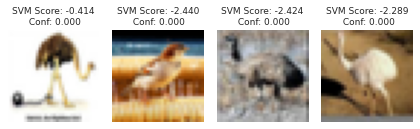

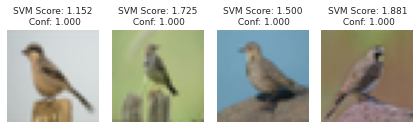

---- SVM ------


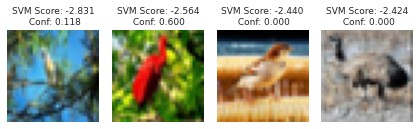

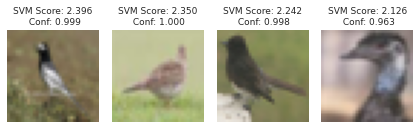

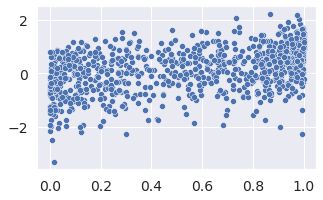

---- CONFIDENCE ------


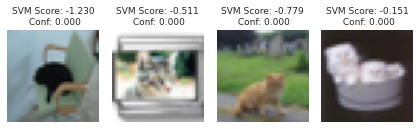

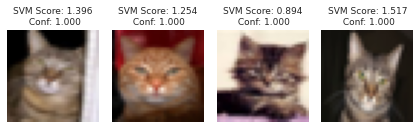

---- SVM ------


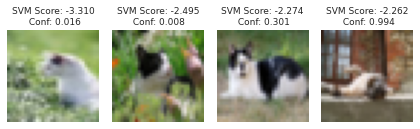

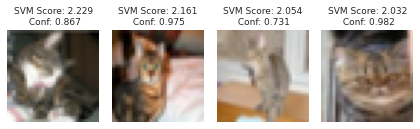

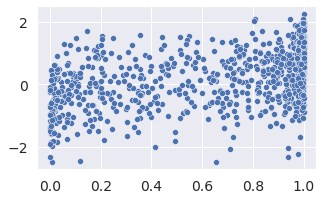

---- CONFIDENCE ------


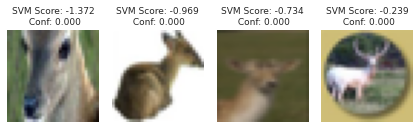

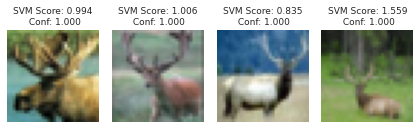

---- SVM ------


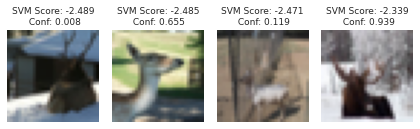

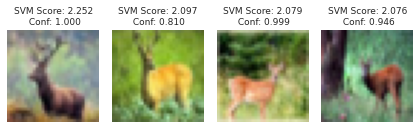

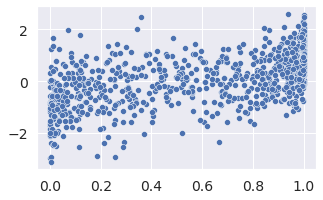

---- CONFIDENCE ------


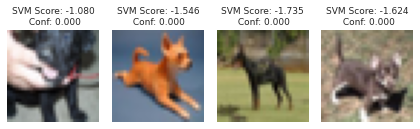

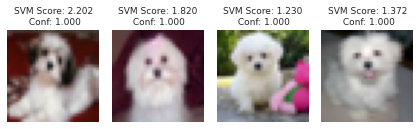

---- SVM ------


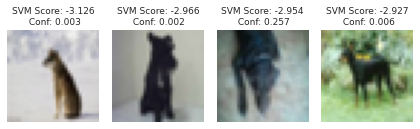

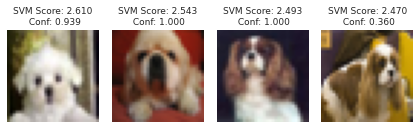

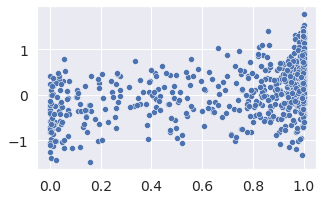

---- CONFIDENCE ------


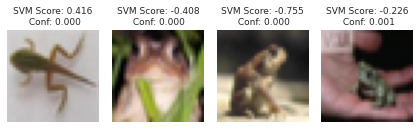

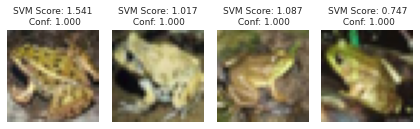

---- SVM ------


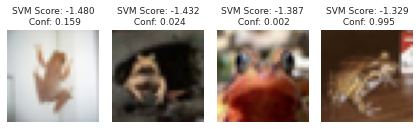

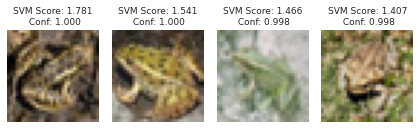

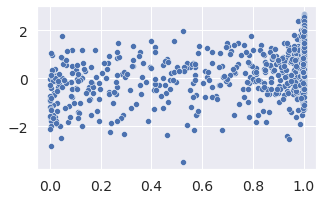

---- CONFIDENCE ------


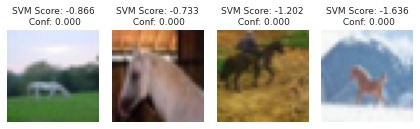

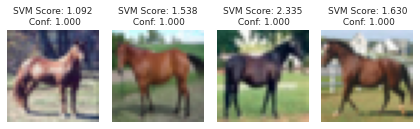

---- SVM ------


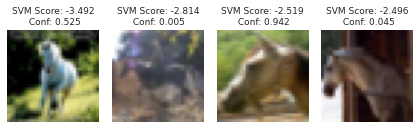

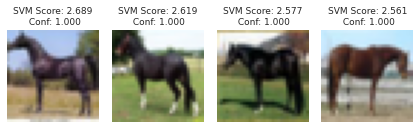

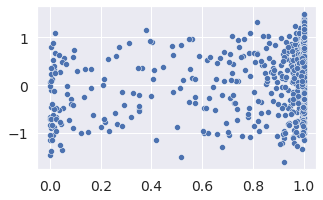

---- CONFIDENCE ------


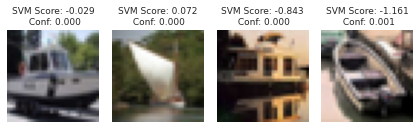

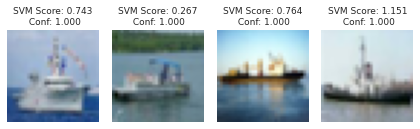

---- SVM ------


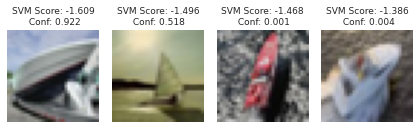

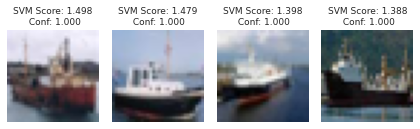

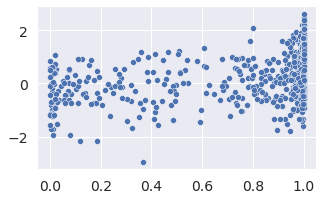

---- CONFIDENCE ------


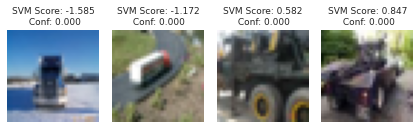

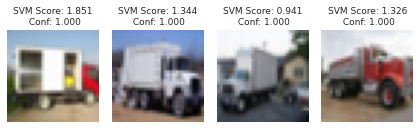

---- SVM ------


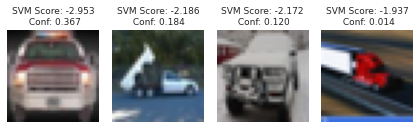

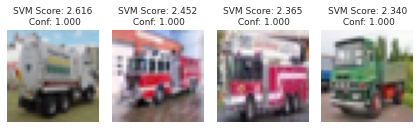

In [5]:
# display extremes for original model
os.makedirs('figures/cifar/', exist_ok=True)
for c in range(10):
    processor.display_extremes(c, split='test', columns=4, rows=1, filename=f'figures/cifar/{c}_extremes')

In [6]:
import src.clip_utils as clip_utils

In [7]:
import importlib
importlib.reload(clip_utils)

<module 'src.clip_utils' from '/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/clip_utils.py'>

In [8]:
clip_analyzer = viz_utils.ClipAnalyzer(
    processor=processor, svm_model_name=svm_model_name, caption_set_name="CIFARSIMPLE", class_names=cifar_label_list)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:05<00:00, 56.99it/s]
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:43: UserWarning: To copy construct from a 

consistent with old results 1.0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 9098.27it/s]

dog
bird
automobile
airplane
truck
ship
frog
cat
horse
deer
reference


0.6642218046323067
performing classify captions on svm


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 130.86it/s]
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:43: UserWarning: To copy construct from a 

{'neg_captions': array(['a photo of a red airplane inside', 'a photo of a red airplane',
       'a photo of a red airplane in the air',
       'a photo of a red airplane outside',
       'a photo of a red airplane flying',
       'a photo of a red airplane on a road',
       'a photo of a red airplane on the tarmac',
       'a photo of a airplane inside',
       'a photo of a orange airplane inside',
       'a photo of a orange airplane on a road'], dtype='<U50'),
 'neg_latents': array([[ 8.91113281e-02,  1.78710938e-01,  1.47705078e-01, ...,
        -2.55126953e-01,  2.15576172e-01,  1.80358887e-02],
       [ 1.57714844e-01,  1.50268555e-01,  2.18383789e-01, ...,
        -2.76367188e-01,  1.00769043e-01,  3.25202942e-04],
       [ 2.38525391e-01,  1.01623535e-01,  1.07360840e-01, ...,
        -2.62695312e-01,  2.40600586e-01, -1.24145508e-01],
       ...,
       [ 1.56005859e-01,  2.57080078e-01, -3.31115723e-03, ...,
        -2.81250000e-01,  2.72216797e-01, -2.03369141e-01],
       

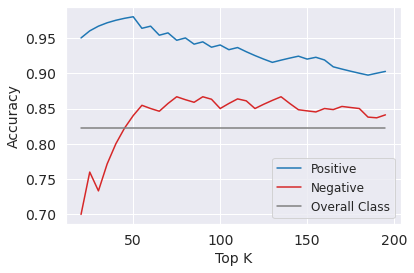

0.7010094305812045
performing classify captions on svm


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 73.23it/s]
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:43: UserWarning: To copy construct from a 

{'neg_captions': array(['a photo of a automobile outside',
       'a photo of a automobile parked', 'a photo of a automobile inside',
       'a photo of a automobile', 'a photo of a brown automobile inside',
       'a photo of a brown automobile parked',
       'a photo of a brown automobile',
       'a photo of a brown automobile outside',
       'a photo of a green automobile inside',
       'a photo of a green automobile outside'], dtype='<U52'),
 'neg_latents': array([[ 0.07891846,  0.36645508, -0.05593872, ..., -0.22521973,
        -0.37817383, -0.14660645],
       [ 0.17382812,  0.2088623 ,  0.02426147, ..., -0.19006348,
        -0.52734375, -0.1538086 ],
       [ 0.02319336,  0.22021484, -0.2529297 , ..., -0.16711426,
        -0.32104492, -0.12371826],
       ...,
       [ 0.06677246,  0.3996582 ,  0.03091431, ..., -0.04257202,
        -0.41625977, -0.23498535],
       [-0.04025269,  0.19604492, -0.22167969, ...,  0.13232422,
        -0.25390625,  0.22509766],
       [ 0.0335083

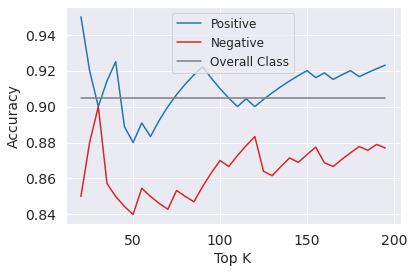

0.6696851119624674
performing classify captions on svm


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 148.98it/s]
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:43: UserWarning: To copy construct from a 

{'neg_captions': array(['a photo of a bird flying', 'a photo of a white bird inside',
       'a photo of a white bird flying', 'a photo of a bird inside',
       'a photo of a white bird in the air',
       'a photo of a red bird flying', 'a photo of a orange bird flying',
       'a photo of a white bird', 'a photo of a bird in the air',
       'a photo of a yellow bird flying'], dtype='<U46'),
 'neg_latents': array([[ 0.35961914,  0.4831543 , -0.09765625, ..., -0.8256836 ,
         0.3635254 , -0.5957031 ],
       [ 0.04241943,  0.07232666,  0.07086182, ..., -0.31079102,
        -0.10949707, -0.39086914],
       [ 0.27734375,  0.32910156,  0.07312012, ..., -0.36816406,
         0.08679199, -0.8432617 ],
       ...,
       [ 0.07434082,  0.17321777,  0.1340332 , ..., -0.22253418,
        -0.1895752 , -0.5644531 ],
       [ 0.3659668 ,  0.41625977, -0.17248535, ..., -0.6928711 ,
         0.21972656, -0.5546875 ],
       [ 0.40795898,  0.37548828, -0.27441406, ..., -0.24475098,
         

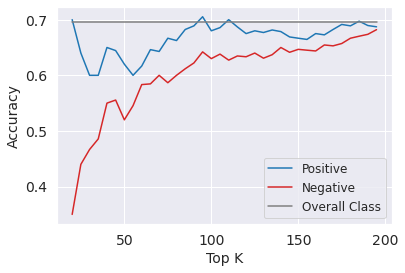

0.6415698284604889
performing classify captions on svm


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 121.04it/s]
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:43: UserWarning: To copy construct from a 

{'neg_captions': array(['a photo of a white cat on the grass',
       'a photo of a red cat on the grass',
       'a photo of a blue cat on the grass',
       'a photo of a green cat on the grass',
       'a photo of a white cat on a green background',
       'a photo of a cat on the grass',
       'a photo of a red cat on a green background',
       'a photo of a blue cat on a green background',
       'a photo of a green cat in the forest',
       'a photo of a white cat in the forest'], dtype='<U45'),
 'neg_latents': array([[ 0.01927185, -0.28222656,  0.04138184, ..., -0.02952576,
        -0.32666016, -0.23205566],
       [ 0.01486206, -0.10961914,  0.03948975, ..., -0.27978516,
        -0.28125   ,  0.02877808],
       [ 0.05148315, -0.44970703, -0.14794922, ..., -0.08685303,
        -0.4477539 ,  0.3918457 ],
       ...,
       [ 0.04934692, -0.4873047 , -0.35888672, ...,  0.16381836,
        -0.36450195,  0.37768555],
       [ 0.04257202,  0.01248169, -0.28466797, ...,  0.0007782

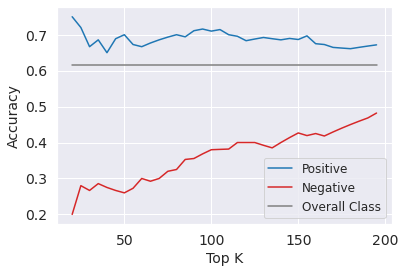

0.6484821828610479
performing classify captions on svm


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 144.30it/s]
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:43: UserWarning: To copy construct from a 

{'neg_captions': array(['a photo of a blue deer in the snow',
       'a photo of a deer in the snow',
       'a photo of a brown deer in the snow',
       'a photo of a black deer in the snow',
       'a photo of a white deer in the snow',
       'a photo of a blue deer on a white background',
       'a photo of a brown deer on a white background',
       'a photo of a deer on a white background',
       'a photo of a black deer on a white background',
       'a photo of a red deer on a white background'], dtype='<U46'),
 'neg_latents': array([[ 0.08953857, -0.18151855, -0.06878662, ..., -0.0581665 ,
        -0.16723633, -0.29882812],
       [ 0.03320312, -0.05493164,  0.03387451, ..., -0.26904297,
        -0.02545166, -0.42138672],
       [ 0.1381836 , -0.03289795,  0.0859375 , ..., -0.10308838,
        -0.11895752, -0.5839844 ],
       ...,
       [-0.02026367, -0.06738281, -0.08660889, ..., -0.16442871,
        -0.03527832, -0.53271484],
       [ 0.21936035, -0.10229492, -0.24145508

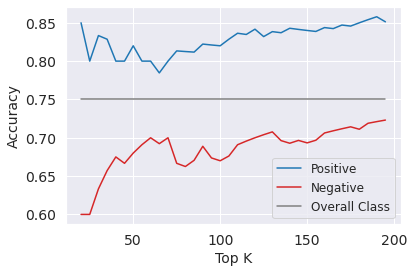

0.6876278118609407
performing classify captions on svm


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 116.39it/s]
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:43: UserWarning: To copy construct from a 

{'neg_captions': array(['a photo of a black dog', 'a photo of a black dog outside',
       'a photo of a black dog inside',
       'a photo of a black dog in the forest',
       'a photo of a brown dog outside', 'a photo of a brown dog',
       'a photo of a black dog on a brown background',
       'a photo of a dog outside', 'a photo of a black dog in a house',
       'a photo of a black dog on a black background'], dtype='<U45'),
 'neg_latents': array([[ 0.30322266,  0.1282959 , -0.3786621 , ..., -0.22485352,
        -0.097229  ,  0.12890625],
       [ 0.2232666 ,  0.23742676, -0.38671875, ..., -0.21643066,
        -0.01754761,  0.19824219],
       [ 0.23474121,  0.01675415, -0.42138672, ..., -0.28881836,
        -0.00364685,  0.18493652],
       ...,
       [ 0.00201416,  0.33740234, -0.2927246 , ..., -0.5834961 ,
        -0.14245605,  0.13000488],
       [ 0.4663086 ,  0.01980591, -0.5395508 , ...,  0.05932617,
         0.09954834,  0.13293457],
       [ 0.11517334, -0.00881195, -0

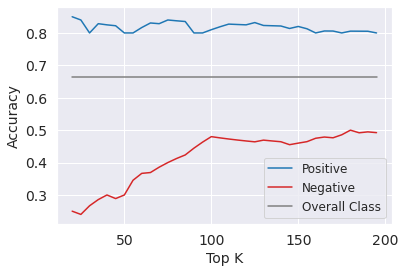

0.6769806482669898
performing classify captions on svm


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 138.17it/s]
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:43: UserWarning: To copy construct from a 

{'neg_captions': array(['a photo of a red frog outside', 'a photo of a red frog',
       'a photo of a red frog in a pond', 'a photo of a red frog inside',
       'a photo of a blue frog outside',
       'a photo of a brown frog outside',
       'a photo of a blue frog in a pond', 'a photo of a brown frog',
       'a photo of a blue frog inside',
       'a photo of a brown frog in a pond'], dtype='<U46'),
 'neg_latents': array([[-0.01174927,  0.07214355,  0.14648438, ...,  0.01852417,
         0.11486816, -0.25585938],
       [ 0.00996399,  0.06134033,  0.12054443, ...,  0.07067871,
        -0.03588867, -0.41259766],
       [-0.06054688,  0.2565918 ,  0.21923828, ...,  0.1772461 ,
         0.13122559, -0.34375   ],
       ...,
       [ 0.01928711,  0.22155762,  0.05871582, ...,  0.01478577,
        -0.11694336, -0.32861328],
       [-0.10137939, -0.17272949, -0.18273926, ...,  0.17272949,
        -0.10186768,  0.07080078],
       [-0.05615234,  0.38964844,  0.13806152, ...,  0.19482422

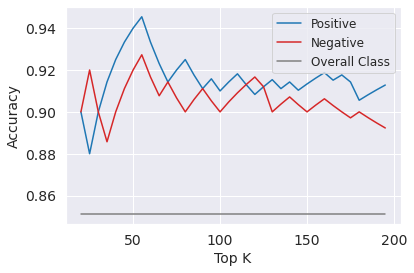

0.6935678717699402
performing classify captions on svm


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 142.44it/s]
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:43: UserWarning: To copy construct from a 

{'neg_captions': array(['a photo of a blue horse inside', 'a photo of a blue horse',
       'a photo of a blue horse on a green background',
       'a photo of a green horse inside',
       'a photo of a blue horse outside',
       'a photo of a blue horse on a blue background',
       'a photo of a green horse', 'a photo of a horse inside',
       'a photo of a blue horse on a white background',
       'a photo of a horse'], dtype='<U47'),
 'neg_latents': array([[ 0.05838013, -0.07336426, -0.25073242, ..., -0.24121094,
        -0.33935547,  0.23474121],
       [ 0.19396973, -0.09875488, -0.16015625, ..., -0.24633789,
        -0.42919922,  0.22167969],
       [ 0.14501953, -0.18103027, -0.2861328 , ...,  0.06152344,
        -0.16271973,  0.28857422],
       ...,
       [ 0.03053284, -0.03704834, -0.14343262, ..., -0.55859375,
        -0.0602417 ,  0.04876709],
       [ 0.11047363, -0.16320801, -0.31835938, ..., -0.17675781,
        -0.24975586, -0.34155273],
       [ 0.13708496,  0.101

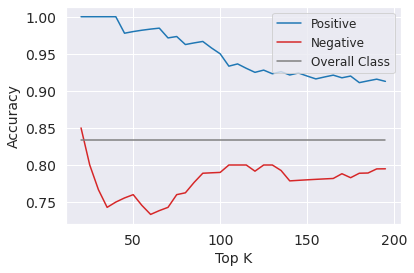

0.6241176656968883
performing classify captions on svm


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 147.81it/s]
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:43: UserWarning: To copy construct from a 

{'neg_captions': array(['a photo of a blue ship inside',
       'a photo of a blue ship on the horizon', 'a photo of a blue ship',
       'a photo of a blue ship outside',
       'a photo of a blue ship in the ocean',
       'a photo of a blue ship on a blue background',
       'a photo of a blue ship on a green background',
       'a photo of a green ship on a blue background',
       'a photo of a green ship inside',
       'a photo of a blue ship on a black background'], dtype='<U46'),
 'neg_latents': array([[ 0.12225342, -0.11669922, -0.18005371, ..., -0.24304199,
        -0.05349731,  0.0692749 ],
       [ 0.18237305, -0.13537598, -0.03305054, ..., -0.31884766,
         0.02104187,  0.14428711],
       [ 0.22497559, -0.09136963, -0.08880615, ..., -0.27172852,
        -0.16027832,  0.05621338],
       ...,
       [ 0.30932617, -0.20458984, -0.28930664, ..., -0.0368042 ,
         0.06469727,  0.14355469],
       [ 0.06713867,  0.05282593, -0.27392578, ..., -0.13098145,
         0.18

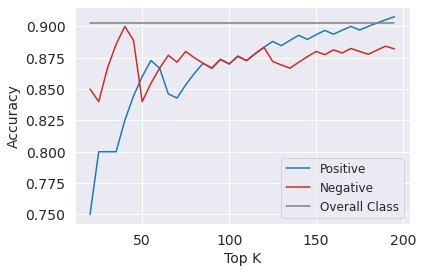

0.6601421725872243
performing classify captions on svm


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 146.53it/s]
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  latents = torch.tensor(latents)
/mnt/cfs/home/saachij/src/failure-directions/analysis_nbs/../failure_directions/src/svm_utils.py:43: UserWarning: To copy construct from a 

{'neg_captions': array(['a photo of a blue truck on the road',
       'a photo of a orange truck on the road',
       'a photo of a blue truck inside',
       'a photo of a brown truck on the road',
       'a photo of a blue truck parked', 'a photo of a blue truck',
       'a photo of a brown truck on a blue background',
       'a photo of a orange truck on a blue background',
       'a photo of a orange truck inside',
       'a photo of a blue truck outside'], dtype='<U47'),
 'neg_latents': array([[ 0.15515137,  0.07885742,  0.08605957, ..., -0.0006237 ,
        -0.22790527,  0.21801758],
       [-0.07580566,  0.3564453 ,  0.20471191, ...,  0.03356934,
        -0.00040913, -0.24902344],
       [ 0.12353516,  0.0307312 , -0.04034424, ..., -0.17626953,
        -0.24194336,  0.16552734],
       ...,
       [ 0.1998291 ,  0.10614014, -0.07000732, ..., -0.00610352,
        -0.05584717, -0.11279297],
       [-0.09344482,  0.32958984,  0.14758301, ..., -0.1274414 ,
        -0.00969696, -0.31

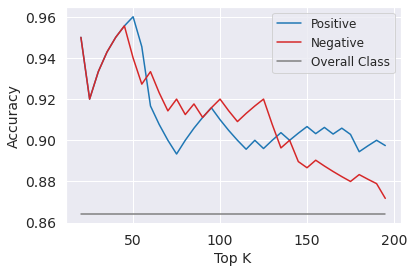

In [28]:
def get_cdf(arr, K_range=None):
    out = []
    if K_range is None:
        K_range = np.arange(10, len(arr), 10)
    for K in K_range:
        out.append(arr[:K].mean())
    out = np.array(out)
    return out, K_range

saved_caption_and_most_relevant_imgs = {}
df_dict = {}
for METHOD in ['CLASSIFY']:
    all_dfs = []
    for target_class in range(10):
        print(processor.metrics['cv_scores'][target_class])

        if METHOD == 'CLOSEST':
            print("performing closest")
            result = clip_analyzer.perform_closest_to_top_K(target_class, 'all')
        else:
            print("performing classify captions on svm")
            result = clip_analyzer.get_svm_style_top_K(target_class, 'all')
        print("--------")

        cdfs = {}
        class_mask = test_class==target_class
        masked_indices = np.arange(len(test_class))[class_mask]
        # K_range = np.arange(10, len(masked_indices), 10)
        K_range=np.arange(20, 200, 5)
#         K_range=np.arange(20, 1000, 5)
        for caption_index in range(1):
            for direction in ['pos', 'neg']:
                caption_text = result[f'{direction}_captions'][caption_index]
                print(f"{direction}: {caption_text}")
                top_caption_latent = torch.tensor(result[f'{direction}_latents'][caption_index]).cuda()

                
                image_latents = clip_analyzer.clip_features['test'][class_mask].cuda()
                image_angles = clip_utils.order_descriptions_angle(mean_point=top_caption_latent.unsqueeze(0), query_points=image_latents)
                image_order = np.argsort(image_angles)[::-1]
                saved_caption_and_most_relevant_imgs[(METHOD, target_class, caption_index, direction)] = (masked_indices[image_order], caption_text)
                dir_name = 'Positive' if direction == 'pos' else 'Negative' 
                cdfs[dir_name], _ = get_cdf(test_correct[masked_indices[image_order]], K_range)
                # uncomment this to display the images
                #processor._display_images(taken_index=masked_indices[image_order], taken_scores=image_angles[image_order],
#                             taken_confs=image_angles[image_order], split="test", filename=f'figures/cifar/images_closest_to_caption/images_closest_to_caption_{target_class}_{direction}')

            df = pd.DataFrame()
            df['Top K'] = K_range
            for d, v in cdfs.items():
                df[d] = v
            df['Overall Class'] = test_correct[masked_indices].mean()
            df = df.melt('Top K', var_name='Order', value_name='Accuracy')
            all_dfs.append(df)
            fig, ax = plt.subplots(1, 1, figsize=(6,4))
            sns.lineplot(data=df, x='Top K', y='Accuracy', hue='Order', ax=ax, 
                         hue_order=['Positive', 'Negative', 'Overall Class'], 
                        palette=[BLUE, RED, GRAY])
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles=handles, labels=labels)
#             plt.axhline(y=test_correct[masked_indices].mean(), xmin=0, xmax=K_range[-1], color='gray')
            #plt.savefig(f'figures/cifar/{target_class}_closest_images.pdf', bbox_inches='tight')
            plt.show()
    df_dict[METHOD] = all_dfs
    

In [29]:
os.makedirs("figures/cifar/images_closest_to_caption", exist_ok=True)

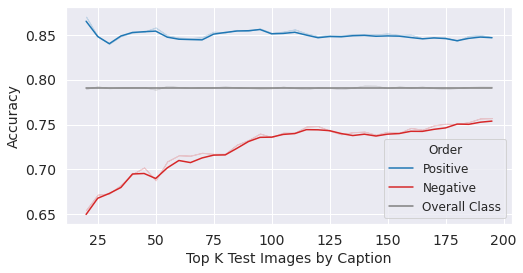

In [30]:
combined_df = pd.concat(df_dict['CLASSIFY']).reset_index()
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.lineplot(data=combined_df, x='Top K', y='Accuracy', hue='Order', ax=ax, 
             hue_order=['Positive', 'Negative', 'Overall Class'], 
            palette=[BLUE, RED, GRAY], ci=False)
# handles, labels = ax.get_legend_handles_labels()
labels[-1] = 'Overall Accuracy'
# ax.legend(handles=handles, labels=labels)
ax.set_xlabel("Top K Test Images by Caption")
plt.savefig(f'figures/cifar/ALL_closest_images.pdf', bbox_inches='tight')
plt.show()

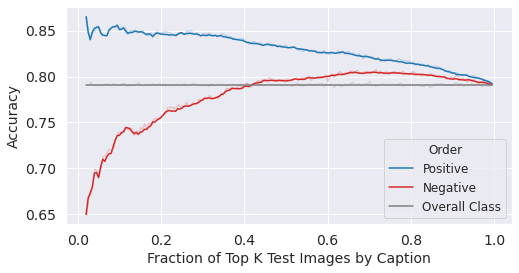

In [27]:
combined_df['Frac K'] = combined_df['Top K']/1000
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.lineplot(data=combined_df, x='Frac K', y='Accuracy', hue='Order', ax=ax, 
             hue_order=['Positive', 'Negative', 'Overall Class'], 
            palette=[BLUE, RED, GRAY], ci=False)
# handles, labels = ax.get_legend_handles_labels()
labels[-1] = 'Overall Accuracy'
# ax.legend(handles=handles, labels=labels)
ax.set_xlabel("Fraction of Top K Test Images by Caption")
plt.savefig(f'figures/cifar/ALL_closest_images_frac.pdf', bbox_inches='tight')
plt.show()

# Subset Intervention

In [14]:
split = 'unlabeled'
unlabeled_dv = processor.metrics[f'{split}_metrics']['decision_values']
unlabeled_confs = processor.run_dict[split]['confs']
unlabeled_class = processor.metrics[f'{split}_metrics']['classes'] # 0 if female, 1 if male
unlabeled_pred_correct = processor.metrics[f'{split}_metrics']['ypred']
unlabeled_correct = processor.metrics[f'{split}_metrics']['ytrue']

In [ ]:
import scipy.stats as scipy_stats
import pandas as pd
rand_perm = np.arange(len(unlabeled_dv))
np.random.shuffle(rand_perm)

all_dv_inds = []
all_conf_inds = []
all_random_inds = []
K_range = np.arange(50, 201, 50)
for K in K_range:
    dv_inds = []
    conf_inds = []
    random_inds = []
    for c in range(processor.hparams['num_classes']):
        mask = unlabeled_class == c
        masked_indices = np.arange(len(mask))[mask]
        N = len(unlabeled_dv[mask])
        dv_order = masked_indices[np.argsort(unlabeled_dv[mask])]
        conf_order = masked_indices[np.argsort(unlabeled_confs[mask])]
        random_order = masked_indices[np.argsort(rand_perm[mask])]
        dv_inds.append(dv_order[:K])
        conf_inds.append(conf_order[:K])
        random_inds.append(random_order[:K])
        
    all_dv_inds.append(np.concatenate(dv_inds))
    all_conf_inds.append(np.concatenate(conf_inds))
    all_random_inds.append(np.concatenate(random_inds))

In [ ]:
indices_file = torch.load(processor.metrics['args']['indices_file'])
u_indices = indices_file['unlabeled_indices']
for name, order in [("dv", all_dv_inds), ('confs', all_conf_inds), ('random', all_random_inds)]:
    for i in range(len(all_dv_inds)):
        subset_indices_dict = {
            'val_indices': indices_file['val_indices'],
            'train_indices': torch.cat([indices_file['train_indices'],u_indices[order[i]]]),
        }
        torch.save(subset_indices_dict, os.path.join(subset_root, name, f'{i}.pt'))


# Analyze results

In [21]:
saved_caption_and_most_relevant_imgs # (METHOD, target_class, caption_index, direction)

{('CLASSIFY',
  0,
  0,
  'pos'): (array([9802, 8812, 4415, 1078, 9980, 4515, 5055,   21, 2892, 8554, 8800,
         4824, 9392, 2400, 1744, 6355, 2368,  382, 1103, 9495, 6247, 1319,
         8769, 9772, 5716, 2672, 1646, 4840, 4305, 7692, 7523, 7196, 5652,
         4802, 1446, 2956, 1902, 5857, 9544, 5091,  791, 4939, 6350, 9946,
         5475, 7929, 8017, 2124, 5735, 4123, 4167, 1365, 2507, 1295,  215,
         1748, 7607, 2622, 8230, 6923, 6772, 7465,  244, 5260, 5524, 3475,
         5583, 9973, 9356, 3845,  315, 9111, 4037, 8894, 6549, 2463, 4118,
         3177, 1343, 5043, 5077,  406, 3445, 6797, 7428, 7684,  527,  338,
         9700, 2344, 7742, 3792, 2122, 9473, 1851, 4270, 2879, 7544, 7696,
         6418, 6351, 6294, 1912, 9413, 9852, 9459, 1785, 7189, 2087, 6261,
         3112, 6462, 3048, 8941, 7871, 2570, 5649,  499, 8267, 9642, 9766,
         1555, 4558, 1776,  447, 9876, 6860, 3087, 4194, 8925, 4040,  297,
         4759, 3866, 9235, 2792, 5357, 3063, 3536, 3965, 1652, 9539

In [12]:
K_range = np.arange(50, 201, 50)
load_corrects = {}
for t in ['dv', 'confs', 'random', 'baseline']:
    for i in range(len(K_range)):
        load_corrects[(t, K_range[i])] = []
        for v in range(10):
            if t == 'baseline':
                is_corrects = torch.tensor(test_correct)
            else:
                path = os.path.join(model_root, f"cifar_0.25_subset_{t}_{i}/version_{v}/metrics.pt")
                out = torch.load(path)
                is_corrects = (out['test']['preds'] == out['test']['classes'])
            load_corrects[(t, K_range[i])].append(is_corrects)
            

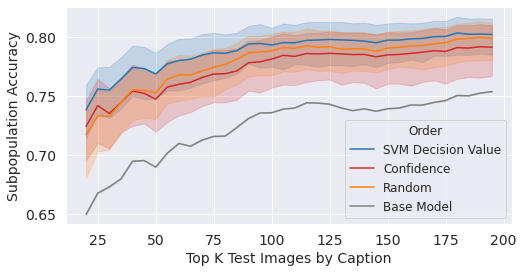

In [14]:
K = 100
all_dfs = []
trials = len(load_corrects[('dv', K)])
name_list = ['dv', 'confs', 'random', 'baseline']
for v in range(trials):
    xaxis = np.arange(20, 200, 5)
    accs = {k:[] for k in name_list}
    for K_ in xaxis:
        minority_indices = []
        for target_c in range(10):
            indices, caption = saved_caption_and_most_relevant_imgs[(METHOD, target_c, 0, 'neg')]
            minority_indices.append(indices[:K_])
        minority_indices = np.concatenate(minority_indices)
        for k in name_list:
            accs[k].append(load_corrects[(k, K)][v][minority_indices].float().mean().item())
    df = pd.DataFrame()
    df['Top K'] = xaxis
    df['SVM Decision Value'] = accs['dv']
    df['Confidence'] = accs['confs']
    df['Random'] = accs['random']
    df['Base Model'] = accs['baseline']
    df = df.melt('Top K', var_name='Order', value_name='Subpopulation Accuracy')
    all_dfs.append(df)
all_df = pd.concat(all_dfs).reset_index()

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.lineplot(data=all_df, x='Top K', y='Subpopulation Accuracy', hue='Order', ax=ax, 
             hue_order=['SVM Decision Value', 'Confidence', 'Random', 'Base Model'], 
            palette=[BLUE, RED, ORANGE, GRAY])
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles, labels=labels)
ax.set_xlabel("Top K Test Images by Caption")
# plt.savefig(f'figures/cifar/intervention.pdf', bbox_inches='tight')
plt.show()

In [57]:
K = 100
METHOD = "CLASSIFY"
all_dfs = []
for v in range(10):
    dfs = []
    for target_c in range(10):
        xaxis = np.arange(20, 200, 5)
        indices, caption = saved_caption_and_most_relevant_imgs[(METHOD, target_c, 0, 'neg')]
        print(caption)
        dv_intervention, _ = get_cdf(load_corrects[('dv', K)][v][indices].float(), xaxis)
        confs_intervention, _ = get_cdf(load_corrects[('confs', K)][v][indices].float(), xaxis)
        baseline_intervention, _ = get_cdf(load_corrects[('baseline', K)][v][indices].float(), xaxis)
        random_intervention, _ = get_cdf(load_corrects[('random', K)][v][indices].float(), xaxis)

        df = pd.DataFrame()
        df['Top K'] = xaxis
        df['SVM Decision Value'] = dv_intervention
        df['Confidence'] = confs_intervention
        df['Base Model'] = baseline_intervention
        df['Random'] = random_intervention
        df = df.melt('Top K', var_name='Order', value_name='Subpopulation Accuracy')
        df['Class'] = target_c
        dfs.append(df)
    combined_df = pd.concat(dfs).reset_index()
    combined_df = combined_df.groupby(['Top K', 'Order']).mean().reset_index()[['Top K', 'Order', 'Subpopulation Accuracy']]
    all_dfs.append(combined_df)

a photo of a red bomber
a photo of a ambulance
a photo of a white oscine inside
a photo of a white mouser on the grass
a photo of a kob inside
a photo of a black feist
a photo of a agua
a photo of a protohippus inside
a photo of a racing gig
a photo of a white passenger van
a photo of a red bomber
a photo of a ambulance
a photo of a white oscine inside
a photo of a white mouser on the grass
a photo of a kob inside
a photo of a black feist
a photo of a agua
a photo of a protohippus inside
a photo of a racing gig
a photo of a white passenger van
a photo of a red bomber
a photo of a ambulance
a photo of a white oscine inside
a photo of a white mouser on the grass
a photo of a kob inside
a photo of a black feist
a photo of a agua
a photo of a protohippus inside
a photo of a racing gig
a photo of a white passenger van
a photo of a red bomber
a photo of a ambulance
a photo of a white oscine inside
a photo of a white mouser on the grass
a photo of a kob inside
a photo of a black feist
a photo

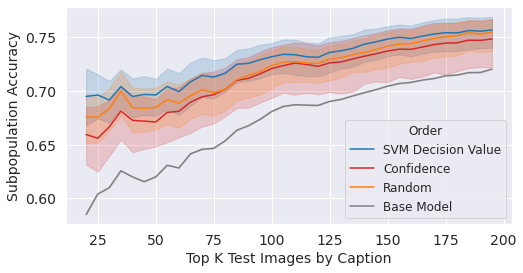

In [58]:
df = pd.concat(all_dfs).reset_index()
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.lineplot(data=df, x='Top K', y='Subpopulation Accuracy', hue='Order', ax=ax, 
             hue_order=['SVM Decision Value', 'Confidence', 'Random', 'Base Model'], 
            palette=[BLUE, RED, ORANGE, GRAY])
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles, labels=labels)
ax.set_xlabel("Top K Test Images by Caption")
# plt.savefig(f'figures/cifar/intervention.pdf', bbox_inches='tight')
plt.show()

In [25]:
big_df = pd.concat(all_dfs)

In [78]:
big_df = pd.concat(all_dfs)
big_df[(big_df['Method'] == 'confs') & (big_df['K'] == 100)]

,K,Method,Subpopulation Accuracy
66,100,dv,0.751
66,100,dv,0.742
66,100,dv,0.714
66,100,dv,0.727
66,100,dv,0.753


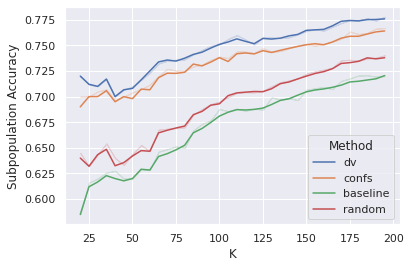

In [22]:
# Average over all classes
combined_df = pd.concat(dfs).reset_index()
sns.lineplot(data=combined_df, x='K', y='Subpopulation Accuracy', hue='Method', ci=False)
plt.show()

# Subset Intervention